**Goal**: this notebook shows the Volcano Plot using the genes computer with Limma Package in R.

### Import Utils and Setup

In [1]:
## Communication drive-colab
from google.colab import drive
import warnings

## Data Structure and Data Analysis
import pandas as pd
import numpy as np

## Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FormatStrFormatter

In [2]:
## Toggle as needed
warnings.filterwarnings("ignore")

In [3]:
## Mount drive
drive.mount("/content/drive", force_remount = True)

Mounted at /content/drive


In [4]:
## Source path
source_path_data = "/content/drive/MyDrive/Tesi/Code/Personal_Code/Saved/Data/"

## Save path
save_path_data = source_path_data

### Read Data

In [5]:
## Load Data
su2c_limma_all_harm = pd.read_csv(source_path_data + "pre_SU2C_limma_out.csv", index_col = 0)

In [6]:
## Check
print("Shape is: ", su2c_limma_all_harm.shape)
display(su2c_limma_all_harm.head())

Shape is:  (15926, 13)


,logFC,AveExpr,t,P.Value,adj.P.Val,B,ensembl_gene_id_version,ensembl_gene_id,Description,gene_biotype,median_log2tpm,gexp_gt1_percent,gexp_gt1_cat
1,-0.403370,1.093088,-1.635074,0.104315,0.403476,-4.315271,ENSG00000187634.11,ENSG00000187634,SAMD11,protein_coding,1.117063,0.785124,50-80%
2,0.088979,5.565879,1.021167,0.308964,0.632204,-5.437019,ENSG00000188976.10,ENSG00000188976,NOC2L,protein_coding,5.311830,0.983471,80-100%
3,-0.019629,3.103165,-0.153923,0.877896,0.954957,-5.669993,ENSG00000187961.13,ENSG00000187961,KLHL17,protein_coding,3.266475,0.983471,80-100%
4,0.194845,2.217655,0.922449,0.357906,0.669481,-5.190195,ENSG00000187583.10,ENSG00000187583,PLEKHN1,protein_coding,2.603013,0.958678,80-100%
5,0.110187,-1.277853,0.368140,0.713334,0.883703,-5.027598,ENSG00000187642.9,ENSG00000187642,PERM1,protein_coding,0.504215,0.512397,50-80%


In [7]:
## Change column name
su2c_limma_all_harm = su2c_limma_all_harm.rename(columns = {"Description": "hgnc_symbol"})

In [8]:
## Check
print("Shape is: ", su2c_limma_all_harm.shape)
display(su2c_limma_all_harm.head())

Shape is:  (15926, 13)


,logFC,AveExpr,t,P.Value,adj.P.Val,B,ensembl_gene_id_version,ensembl_gene_id,hgnc_symbol,gene_biotype,median_log2tpm,gexp_gt1_percent,gexp_gt1_cat
1,-0.403370,1.093088,-1.635074,0.104315,0.403476,-4.315271,ENSG00000187634.11,ENSG00000187634,SAMD11,protein_coding,1.117063,0.785124,50-80%
2,0.088979,5.565879,1.021167,0.308964,0.632204,-5.437019,ENSG00000188976.10,ENSG00000188976,NOC2L,protein_coding,5.311830,0.983471,80-100%
3,-0.019629,3.103165,-0.153923,0.877896,0.954957,-5.669993,ENSG00000187961.13,ENSG00000187961,KLHL17,protein_coding,3.266475,0.983471,80-100%
4,0.194845,2.217655,0.922449,0.357906,0.669481,-5.190195,ENSG00000187583.10,ENSG00000187583,PLEKHN1,protein_coding,2.603013,0.958678,80-100%
5,0.110187,-1.277853,0.368140,0.713334,0.883703,-5.027598,ENSG00000187642.9,ENSG00000187642,PERM1,protein_coding,0.504215,0.512397,50-80%


### Volcano Plot

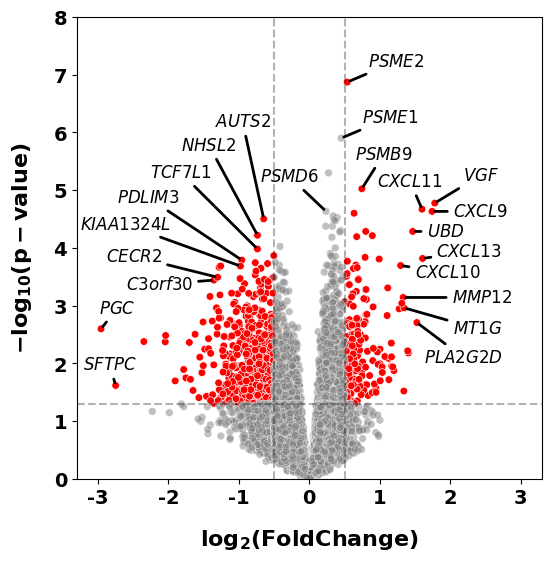

In [9]:
## Start
df = su2c_limma_all_harm
df["hue"] = 1

## Filtering operations on p-values and logFC
df_p_f = df[(df["P.Value"]<0.05) & (abs(df["logFC"])>0.5)]
df_n   = df[(df["P.Value"]>=0.05) & (abs(df["logFC"])<=0.5)]
df_f   = df[(df["P.Value"]>=0.05) & (abs(df["logFC"])>0.5)]
df_p   = df[(df["P.Value"]<0.05) & (abs(df["logFC"])<=0.5)]

## Create a list of conditions
df_list = [df_p_f, df_p, df_f, df_n]
fig,ax = plt.subplots(figsize = (6, 6))
palette_list = ["red", "gray", "gray", "gray"]

alpha_list = [1, 0.5, 0.5, 0.5]

## Cycle
for i in range(0, 4):
    df = df_list[i]
    x = df["logFC"]
    y = df["P.Value"]
    h = sns.scatterplot(x = x, y = -np.log10(y), ax = ax, s = 30, alpha = alpha_list[i], hue = df["hue"],
                        palette = [palette_list[i]], legend = None)

## Cycle for all the genes in the matrix
for i in range(0, len(su2c_limma_all_harm.index)):
        df = su2c_limma_all_harm
        ## Set x and y axes
        x = df["logFC"]
        y = df["P.Value"]

        xi = x.iloc[i]
        yi = -np.log10(y.iloc[i])

        gene = df["hgnc_symbol"].iloc[i]

        if gene == "PSME2":
            plt.annotate("${gene}$".format(gene = gene), xy = (xi, yi), xycoords = "data", xytext = (15,15), textcoords = "offset points",
                         va = "center", ha = "left", arrowprops = dict(arrowstyle = "-", lw = 2, color = "k"), size = 12)
        if gene == "PSME1":
            plt.annotate("${gene}$".format(gene = gene), xy = (xi, yi), xycoords = "data", xytext = (15, 15), textcoords = "offset points",
                         va = "center", ha = "left", arrowprops = dict(arrowstyle = "-", lw = 2, color = "k"), size = 12)
        if gene == "PSMB9":
            plt.annotate("${gene}$".format(gene = gene), xy = (xi, yi), xycoords = "data", xytext = (-5, 25), textcoords = "offset points",
                         va = "center", ha = "left", arrowprops = dict(arrowstyle = "-", lw = 2, color = "k"), size = 12)
        if gene == "PSMD6":
            plt.annotate("${gene}$".format(gene = gene), xy =(xi, yi), xycoords = "data", xytext = (-5, 25), textcoords = "offset points",
                         va = "center", ha = "right", arrowprops = dict(arrowstyle = "-", lw = 2, color = "k"), size = 12)
        if gene == "VGF":
            plt.annotate("${gene}$".format(gene = gene), xy = (xi, yi), xycoords = "data", xytext = (20, 20), textcoords = "offset points",
                         va = "center", ha = "left", arrowprops = dict(arrowstyle = "-", lw = 2, color = "k"), size = 12)
        if gene == "CXCL11":
            plt.annotate("${gene}$".format(gene = gene), xy = (xi, yi), xycoords = "data", xytext = (15, 20), textcoords = "offset points",
                         va = "center", ha = "right", arrowprops = dict(arrowstyle = "-", lw = 2, color = "k"), size = 12)
        if gene == "CXCL9":
            plt.annotate("${gene}$".format(gene = gene), xy = (xi, yi), xycoords = "data" , xytext = (15, 0), textcoords = "offset points",
                         va = "center", ha = "left", arrowprops = dict(arrowstyle = "-", lw = 2, color = "k"), size = 12)
        if gene == "UBD":
            plt.annotate("${gene}$".format(gene = gene), xy = (xi, yi), xycoords = "data", xytext = (10, 0), textcoords = "offset points",
                         va = "center", ha = "left", arrowprops = dict(arrowstyle = "-", lw = 2, color = "k"), size = 12)
        if gene == "CXCL13":
            plt.annotate("${gene}$".format(gene = gene), xy = (xi, yi), xycoords = "data", xytext = (10, 5), textcoords = "offset points",
                         va = "center", ha = "left", arrowprops = dict(arrowstyle = "-", lw = 2, color = "k"), size = 12)
        if gene == "CXCL10":
            plt.annotate("${gene}$".format(gene = gene), xy = (xi, yi), xycoords = "data", xytext = (10, -5), textcoords = "offset points",
                         va = "center", ha = "left", arrowprops = dict(arrowstyle = "-", lw = 2, color = "k"), size = 12)
        if gene == "MMP12":
            plt.annotate("${gene}$".format(gene = gene), xy = (xi, yi), xycoords = "data", xytext = (35, 0), textcoords = "offset points",
                         va = "center", ha = "left", arrowprops = dict(arrowstyle = "-", lw = 2, color = "k"), size = 12)
        if gene == "MT1G":
            plt.annotate("${gene}$".format(gene = gene), xy =(xi, yi), xycoords = "data", xytext = (35, -15), textcoords = "offset points",
                         va = "center", ha = "left", arrowprops = dict(arrowstyle = "-", lw = 2, color = "k"), size = 12)
        if gene == "PLA2G2D":
            plt.annotate("${gene}$".format(gene = gene), xy = (xi, yi), xycoords = "data", xytext =(5, -25), textcoords = "offset points",
                         va = "center", ha = "left", arrowprops = dict(arrowstyle = "-", lw = 2, color = "k"), size = 12)
        if gene == "AUTS2":
            plt.annotate("${gene}$".format(gene = gene), xy = (xi, yi), xycoords = "data", xytext = (5, 70), textcoords = "offset points",
                         va = "center", ha = "right", arrowprops = dict(arrowstyle = "-", lw = 2, color = "k"), size = 12)
        if gene == "NHSL2":
            plt.annotate("${gene}$".format(gene = gene), xy = (xi, yi), xycoords = "data", xytext = (-15, 65), textcoords = "offset points",
                         va = "center", ha = "right", arrowprops = dict(arrowstyle = "-", lw = 2, color = "k"), size = 12)
        if gene == "TCF7L1":
            plt.annotate("${gene}$".format(gene = gene), xy = (xi, yi), xycoords = "data", xytext = (-33, 55), textcoords = "offset points",
                         va = "center", ha = "right", arrowprops = dict(arrowstyle = "-", lw = 2, color = "k"), size = 12)
        if gene == "KIAA1324L":
            plt.annotate("${gene}$".format(gene = gene), xy = (xi, yi), xycoords = "data", xytext = (-50, 30), textcoords = "offset points",
                         va = "center", ha = "right", arrowprops = dict(arrowstyle = "-", lw = 2, color = "k"), size = 12)
        if gene == "PDLIM3":
            plt.annotate("${gene}$".format(gene = gene), xy = (xi, yi), xycoords = "data", xytext = (-45, 45), textcoords = "offset points",
                         va = "center", ha = "right", arrowprops = dict(arrowstyle = "-", lw = 2, color = "k"), size = 12)
        if gene == "CECR2":
            plt.annotate("${gene}$".format(gene = gene), xy = (xi, yi), xycoords = "data", xytext = (-40, 15), textcoords = "offset points",
                         va = "center", ha = "right", arrowprops = dict(arrowstyle = "-", lw = 2, color = "k"), size = 12)
        if gene == "C3orf30":
            plt.annotate("${gene}$".format(gene = gene), xy = (xi, yi), xycoords = "data", xytext = (-15, -3), textcoords = "offset points",
                         va = "center", ha = "right", arrowprops = dict(arrowstyle = "-", lw = 2, color = "k"), size = 12)
        if gene == "PGC":
            plt.annotate("${gene}$".format(gene = gene), xy = (xi, yi), xycoords = "data", xytext = (25, 15), textcoords = "offset points",
                         va = "center", ha = "right", arrowprops = dict(arrowstyle = "-", lw = 2, color = "k"), size = 12)
        if gene == "SFTPC":
            plt.annotate("${gene}$".format(gene = gene), xy = (xi, yi), xycoords = "data", xytext = (15, 15), textcoords = "offset points",
                         va = "center", ha = "right", arrowprops = dict(arrowstyle = "-", lw = 2, color ="k"), size = 12)

plt.xlim(-3.3,3.3)
plt.ylim(0,8)
xmin = ax.get_xlim()[0]
xmax = ax.get_xlim()[1]
ymin = ax.get_ylim()[0]
ymax = ax.get_ylim()[1]
plt.hlines(y = -np.log10(.05), xmin = xmin, xmax = xmax, linestyles = "dashed", colors = "k", alpha = 0.3)
plt.vlines(x = 0.5, ymin = ymin, ymax = ymax, linestyles = "dashed", colors = "k", alpha = 0.3)
plt.vlines(x = -0.5,ymin = ymin, ymax = ymax, linestyles = "dashed", colors = "k", alpha = 0.3)
plt.xlabel("Coefficient", labelpad = 10,size = 14, fontweight = "bold")
plt.ylabel("-log10p", labelpad = 10, size = 14, fontweight = "bold")
_ = ax.set_xlabel("$\mathregular{log_{2}(Fold Change)}$", weight= "bold", fontsize = 16, labelpad = 14)
_ = ax.set_ylabel("$\mathregular{-log_{10}(p-value)}$", weight = "bold", fontsize = 16, labelpad = 14)
_ = ax.set_xticklabels(np.round(ax.get_xticks()), weight = "bold", fontsize = 14)
_ = ax.set_yticklabels(np.round(ax.get_yticks(), 1), weight = "bold", fontsize = 14)
ax.yaxis.set_major_formatter(FormatStrFormatter("%.0f"))
ax.xaxis.set_major_formatter(FormatStrFormatter("%.0f"))

In [10]:
## Check
print("Names of genes that are differential expressed:")
display(df_p_f["hgnc_symbol"].head(20))
print("\n")
print("Total Number of differential expressed genes: ", len(df_p_f))

Names of genes that are differential expressed:


28     ANKRD65
79      TAS1R1
89     TNFRSF9
142       PDPN
144       KAZN
178     IGSF21
195    PLA2G2D
249        RHD
271     ZNF683
333    COL16A1
334     ADGRB2
370      CSMD2
374       GJB3
386      CLSPN
408      RSPO1
410      CDCA8
436     MFSD2A
476      CDC20
523     LURAP1
534     CYP4B1
Name: hgnc_symbol, dtype: object



Total Number of differential expressed genes:  857


This dataset will be used for filtering the RNA-Seq data before the Network Analysis.

In [23]:
## Check if Response hubs are in DEGs
response_hubs = ["ANGPT1", "TNS1", "PREX2", "AOC3", "PKNOX2", "SCN7A", "PLEKHH2", "RBMS3", "LDB2", "DLC1", "TNXB", "DENND2A", "PTPRB", "ABCA8", "SHROOM4", "FILIP1",
                 "PRKG1", "MYH10", "TBX5", "NPR1", "C14orf132", "ARHGEF15", "ABCA10", "AGER", "ROBO4", "RASL12", "MFAP4", "ADAMTSL3", "LMCD1", "DACT3", "LIMS2", "ROBO2",
                 "ABI3BP", "LRRC36", "RGCC"]
resistance_hubs = ["LDB2", "AOC3", "MAMDC2", "TBX2", "INMT", "ROBO4", "MYH10", "SCN7A", "SPC25", "COL6A6", "H2BC13", "SLIT3", "LIMS2", "ABI3BP", "PREX2", "FOXF1",
                   "ARHGAP6", "JAM2", "DDR2", "HJURP", "VEGFD", "NUF2", "AGER", "ANGPT1", "MFAP4", "KIF4A", "BUB1", "H2AC8", "H2BC17", "PKNOX2", "GLT8D2"]

## Check
print("Number of Response Hubs: ", len(response_hubs))
print("Number of Response Hubs in DEGs: ", len(list(set(response_hubs).intersection(df_p_f["hgnc_symbol"]))))
print("\n")

print("Number of Resistance Hubs: ", len(resistance_hubs))
print("Number of Response Hubs in DEGs: ", len(list(set(resistance_hubs).intersection(df_p_f["hgnc_symbol"]))))

Number of Response Hubs:  35
Number of Response Hubs in DEGs:  35


Number of Resistance Hubs:  31
Number of Response Hubs in DEGs:  28


In [24]:
## Not common for Resistance Group
set(resistance_hubs) ^ set(list(set(resistance_hubs).intersection(df_p_f["hgnc_symbol"])))

{'H2AC8', 'H2BC13', 'H2BC17'}

Rappresentare se gli Hubs Resistance/Response sono up/down-regulated.

In [ ]:
## Save the list
with open(save_path_data + "diff_expressed_genes.csv", "w") as output:
    output.write(str(df_p_f.to_csv()))